In [4]:
from osgeo import gdal
import numpy as np
from matplotlib import pyplot as plt
from glob import glob
import datetime
#from GdalHandle import MultiImages, GImage
%matplotlib inline

In [5]:
def graph(x, y):
    files = ["/home/faizan/Pakistan/EVI/2010/sindh.2010%03d"  % (i) + ".tif" for i in range(91, 335) ]
    ds = gdal.Open(files[0])
    evi = np.array([ds.ReadAsArray()[(x, y)]])
    for i in files[1:]:
        ds = gdal.Open(i)
        evi = np.vstack([evi, ds.ReadAsArray()[(x, y)]])
    plt.plot(range(91, len(evi)+91), evi / 10000.)
    plt.show()

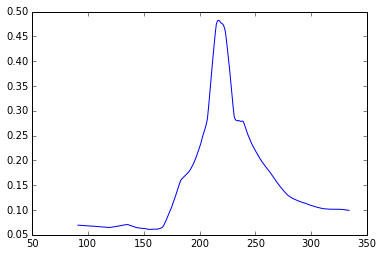

NameError: name 'max_date' is not defined

In [7]:
x, y = (555, 583)
graph(x, y)
#print max_date[x, y]

In [9]:
from osgeo import gdal
import numpy as np
from matplotlib import pyplot as plt
from glob import glob
import datetime
from GdalHandle import MultiImages, GImage
%matplotlib inline

In [92]:
ds = gdal.Open("/home/faizan/HDD1/anomaly/cru_pak.2013.10.tmx.anomaly.sindh.tif")
array_mask = ds.ReadAsArray().reshape(9 * 10)
array_mask = array_mask != -9999.

In [39]:
ds = gdal.Open("/home/faizan/HDD1/EVI/2002/Pak_crop.2002.Jan_avg_evi_value.sindh2.tif")
array_mask1 = ds.ReadAsArray().reshape(9 * 10)
array_mask1 = array_mask != 0.

In [41]:
files = ["/home/faizan/HDD1/EVI/%d/Pak_crop.%d.%s_avg_evi_value.sindh2.tif" % (year, year, m) for year in range(2002, 2014) \
         for m  in ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"] ]
mimage = MultiImages(files)
EArray = mimage.AllArrays

In [42]:

files = [["/home/faizan/HDD1/anomaly/cru_pak.%d.%02d.tmx.anomaly.sindh.tif" % \
          (year, month) for year in range(2002, 2014)] for month in range(1, 13)]
mimage = MultiImages(files[5])
CArray = mimage.AllArrays

In [102]:
mon=["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
for month in range(1, 13):   
    files = ["/home/faizan/HDD1/anomaly/cru_pak.%d.%02d.tmx.anomaly.sindh.tif" % (year, month) for year in range(2002, 2014)]
    mimage = MultiImages(files)
    CArray = mimage.AllArrays
    files = ["/home/faizan/HDD1/EVI/%d/Pak_crop.%d.%s_avg_evi_value.sindh2.tif" % (year, year, mon[month-1]) for year in range(2002, 2014)]
    mimage = MultiImages(files)
    EArray = mimage.AllArrays
    print np.corrcoef(EArray[: , array_mask1].reshape(12 * 52), CArray[:, array_mask1].reshape(12 * 52))[0][1]

0.0158721939645
0.0136040897997
-0.00580132397477
0.0050934280753
0.00263256159279
0.0406588746234
0.048910067781
0.0371845616158
0.0173344928331
-0.0140384720846
0.00260325945578
-0.00914216067012


In [103]:
len(CArray[: , array_mask1][0])
    


52

In [98]:
np.mean(CArray[0])

-4221.6615261734214

In [99]:
np.mean(EArray[0])

-3262.9896825396822

In [105]:
EArray[: , array_mask1]

array([[ 1274.78571429,  1109.71428571,  1751.10714286,   593.03571429,
         1728.60714286,  1751.28571429,  2363.67857143,  1829.78571429,
          774.64285714,  1261.67857143,  2268.46428571,   967.82142857,
          761.28571429,  1022.14285714,  1340.21428571,  2740.96428571,
          673.67857143,   996.        ,  1467.46428571,  2028.14285714,
         1792.71428571,   790.17857143,   634.17857143, -9999.        ,
          745.14285714,  1861.67857143,  1662.25      ,  2237.71428571,
          788.32142857,   871.60714286,  1884.82142857,  1675.28571429,
         2460.67857143,   891.71428571,   748.17857143, -9999.        ,
          930.53571429,   601.25      ,  2021.5       ,  1589.67857143,
         1560.75      ,   753.42857143,   805.57142857,  -299.42857143,
         2025.10714286,   969.82142857,  1635.57142857,   752.78571429,
          789.71428571,   781.21428571, -9999.        ,   254.60714286],
       [ 1469.57142857,  1233.39285714,  1751.03571429,   781.9

In [104]:
CArray[: , array_mask1]

array([[  6.69505882e-01,   6.60247313e-01,   6.90450963e-01,
          5.50676486e-01,   5.66198265e-01,   5.61672672e-01,
          8.34522960e-01,   9.56526648e-01,   5.24008163e-01,
          3.46193858e-01,   4.13569196e-01,   5.79607368e-01,
          0.00000000e+00,   5.24675330e-01,   2.49356829e-01,
          3.18717305e-01,   3.36440174e-01,   3.86730740e-01,
          2.28814381e-02,  -3.34616424e-02,   3.85290619e-01,
          4.88155280e-01,   0.00000000e+00,   2.85745491e-01,
         -1.10647635e-01,  -2.85490284e-01,   1.12940869e-01,
          2.54046150e-01,   8.00080012e-02,  -2.16701131e-01,
         -3.91440681e-01,  -6.17082814e-02,   1.32363951e-01,
          2.88303995e-01,   4.68699940e-01,   0.00000000e+00,
          3.49197767e-01,  -9.65234178e-02,  -9.27194741e-02,
         -1.32542701e-01,  -5.10097867e-02,   1.17309283e-01,
          2.96112279e-01,   5.53310190e-01,   4.91127305e-01,
          2.11959077e-01,   0.00000000e+00,   1.07884623e-01,
        

In [119]:
mean_yield = np.array([EArray[i][np.where((array_mask) & (EArray[i] != -9999.))].mean() for i in range(EArray.shape[0])])

def calc_corr(month, files):
    mimage = MultiImages(files[month])
    CArray = mimage.AllArrays
    mean_climate = np.array([CArray[i][np.where((array_mask) & (EArray[i] != -9999.))].mean() for i in range(EArray.shape[0])])
    return np.corrcoef(mean_yield, mean_climate)[0][1]

files = [["/home/faizan/HDD1/anomaly/cru_pak.%d.%02d.tmx.anomaly.sindh.tif" % \
          (year, month) for year in range(2002, 2014)] for month in range(1, 13)]
tmx_corr = np.array([calc_corr(month, files) for month in range(12)])

files = [["/home/faizan/HDD1/anomaly/cru_pak.%d.%02d.tmn.anomaly.sindh.tif" % \
          (year, month) for year in range(2002, 2014)] for month in range(1, 13)]
tmn_corr = np.array([calc_corr(month, files) for month in range(12)])

files = [["/home/faizan/HDD1/anomaly/cru_pak.%d.%02d.pre.anomaly.sindh.tif" % \
          (year, month) for year in range(2002, 2014)] for month in range(1, 13)]
pre_corr = np.array([calc_corr(month, files) for month in range(12)])

files = [["/home/faizan/HDD1/anomaly/cru_pak.%d.%02d.pet.anomaly.sindh.tif" % \
          (year, month) for year in range(2002, 2014)] for month in range(1, 13)]
pet_corr = np.array([calc_corr(month, files) for month in range(12)])

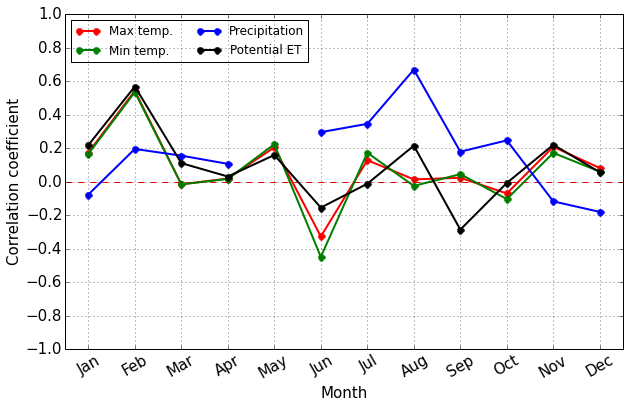

In [133]:
plt.figure(figsize=(10, 6))
plt.setp(plt.gca().get_xticklabels(), fontsize=15, visible=True, rotation=30)
plt.setp(plt.gca().get_yticklabels(), fontsize=15, visible=True)
plt.plot(range(1,13), tmx_corr, "ro-", lw=2, markeredgecolor="r", markersize=7, label="Max temp.")
plt.plot(range(1,13), tmn_corr, "go-", lw=2, markeredgecolor="g", markersize=7, label="Min temp.")
plt.plot(range(1,13), pre_corr, "bo-", lw=2, markeredgecolor="b", markersize=7, label="Precipitation")
plt.plot(range(1,13), pet_corr, "ko-", lw=2, markeredgecolor="k", markersize=7, label="Potential ET")
plt.ylabel("Correlation coefficient", fontsize=15)
plt.ylim(-1., 1.)
plt.xlabel("Month", fontsize=15)
plt.xlim(0.5, 12.5)
plt.xticks([i for i in range(1, 13)], ["Jan","Feb","Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.yticks([i / 10. for i in range(-10, 11, 2)])
plt.grid()
plt.legend(loc=2, ncol=2)
plt.hlines([0.], 0, 13, linestyles="dashed", colors="red")
plt.savefig("/home/faizan/Pakistan/EVI/images/EVI_corr.png")
plt.show()

In [123]:
mean_yield = np.array([EArray[i][np.where((array_mask) & (EArray[i] != -9999.))].mean() for i in range(EArray.shape[0])])

def calc_corr(month, files):
    mimage = MultiImages(files[month])
    CArray = mimage.AllArrays
    mean_climate = np.array([CArray[i][np.where((array_mask) & (EArray[i] != -9999.))].mean() for i in range(EArray.shape[0])])
    return np.corrcoef(mean_yield, mean_climate)[0][1]

files = [["/home/faizan/HDD1/anomaly/cru_pak.%d.%02d.tmx.anomaly.sindh.tif" % \
          (year, month) for year in range(2002, 2014)] for month in range(1, 13)]
tmx_corr = np.array([calc_corr(month, files) for month in range(12)])

files = [["/home/faizan/HDD1/anomaly/cru_pak.%d.%02d.tmn.anomaly.sindh.tif" % \
          (year, month) for year in range(2002, 2014)] for month in range(1, 13)]
tmn_corr = np.array([calc_corr(month, files) for month in range(12)])

files = [["/home/faizan/HDD1/anomaly/cru_pak.%d.%02d.pre.anomaly.sindh.tif" % \
          (year, month) for year in range(2002, 2014)] for month in range(1, 13)]
pre_corr = np.array([calc_corr(month, files) for month in range(12)])

files = [["/home/faizan/HDD1/anomaly/cru_pak.%d.%02d.pet.anomaly.sindh.tif" % \
          (year, month) for year in range(2002, 2014)] for month in range(1, 13)]
pet_corr = np.array([calc_corr(month, files) for month in range(12)])

files = [["/home/faizan/HDD1/anomaly/cru_pak.%d.%02d.tmp.anomaly.sindh.tif" % \
          (year, month) for year in range(2002, 2014)] for month in range(1, 13)]
tmp_corr = np.array([calc_corr(month, files) for month in range(12)])

files = [["/home/faizan/HDD1/anomaly/cru_pak.%d.%02d.dtr.anomaly.sindh.tif" % \
          (year, month) for year in range(2002, 2014)] for month in range(1, 13)]
dtr_corr = np.array([calc_corr(month, files) for month in range(12)])

files = [["/home/faizan/HDD1/anomaly/cru_pak.%d.%02d.wet.anomaly.sindh.tif" % \
          (year, month) for year in range(2002, 2014)] for month in range(1, 13)]
wet_corr = np.array([calc_corr(month, files) for month in range(12)])

files = [["/home/faizan/HDD1/anomaly/cru_pak.%d.%02d.vap.anomaly.sindh.tif" % \
          (year, month) for year in range(2002, 2014)] for month in range(1, 13)]
vap_corr = np.array([calc_corr(month, files) for month in range(12)])

In [122]:
files = [["/home/faizan/HDD1/anomaly/cru_pak.%d.%02d.tmp.anomaly.sindh.tif" % \
          (year, month) for year in range(2002, 2014)] for month in range(1, 13)]
files

[['/home/faizan/HDD1/anomaly/cru_pak.2002.01.tmp.anomaly.sindh.tif',
  '/home/faizan/HDD1/anomaly/cru_pak.2003.01.tmp.anomaly.sindh.tif',
  '/home/faizan/HDD1/anomaly/cru_pak.2004.01.tmp.anomaly.sindh.tif',
  '/home/faizan/HDD1/anomaly/cru_pak.2005.01.tmp.anomaly.sindh.tif',
  '/home/faizan/HDD1/anomaly/cru_pak.2006.01.tmp.anomaly.sindh.tif',
  '/home/faizan/HDD1/anomaly/cru_pak.2007.01.tmp.anomaly.sindh.tif',
  '/home/faizan/HDD1/anomaly/cru_pak.2008.01.tmp.anomaly.sindh.tif',
  '/home/faizan/HDD1/anomaly/cru_pak.2009.01.tmp.anomaly.sindh.tif',
  '/home/faizan/HDD1/anomaly/cru_pak.2010.01.tmp.anomaly.sindh.tif',
  '/home/faizan/HDD1/anomaly/cru_pak.2011.01.tmp.anomaly.sindh.tif',
  '/home/faizan/HDD1/anomaly/cru_pak.2012.01.tmp.anomaly.sindh.tif',
  '/home/faizan/HDD1/anomaly/cru_pak.2013.01.tmp.anomaly.sindh.tif'],
 ['/home/faizan/HDD1/anomaly/cru_pak.2002.02.tmp.anomaly.sindh.tif',
  '/home/faizan/HDD1/anomaly/cru_pak.2003.02.tmp.anomaly.sindh.tif',
  '/home/faizan/HDD1/anomaly/cru_

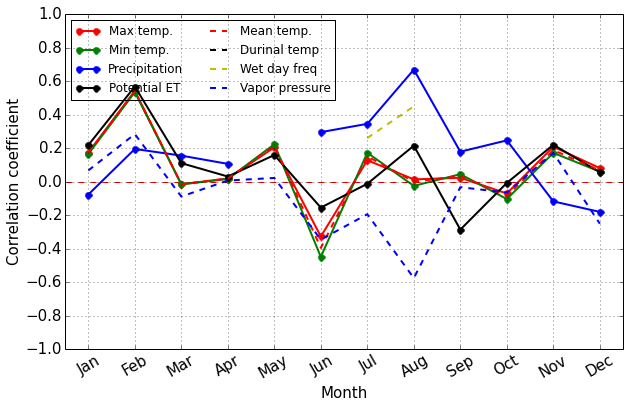

In [132]:
plt.figure(figsize=(10, 6))
plt.setp(plt.gca().get_xticklabels(), fontsize=15, visible=True, rotation=30)
plt.setp(plt.gca().get_yticklabels(), fontsize=15, visible=True)
plt.plot(range(1,13), tmx_corr, "ro-", lw=2, markeredgecolor="r", markersize=7, label="Max temp.")
plt.plot(range(1,13), tmn_corr, "go-", lw=2, markeredgecolor="g", markersize=7, label="Min temp.")
plt.plot(range(1,13), pre_corr, "bo-", lw=2, markeredgecolor="b", markersize=7, label="Precipitation")
plt.plot(range(1,13), pet_corr, "ko-", lw=2, markeredgecolor="k", markersize=7, label="Potential ET")
plt.plot(range(1,13), tmp_corr, "r--", lw=2, markeredgecolor="r", markersize=7, label="Mean temp.")
plt.plot(range(1,13), dtr_corr, "k--", lw=2, markeredgecolor="k", markersize=7, label="Durinal temp")
plt.plot(range(1,13), wet_corr, "y--", lw=2, markeredgecolor="y", markersize=7, label="Wet day freq")
plt.plot(range(1,13), vap_corr, "b--", lw=2, markeredgecolor="b", markersize=7, label="Vapor pressure")
plt.ylabel("Correlation coefficient", fontsize=15)
plt.ylim(-1., 1.)
plt.xlabel("Month", fontsize=15)
plt.xlim(0.5, 12.5)
plt.xticks([i for i in range(1, 13)], ["Jan","Feb","Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.yticks([i / 10. for i in range(-10, 11, 2)])
plt.grid()
plt.legend(loc=2, ncol=2)
plt.hlines([0.], 0, 13, linestyles="dashed", colors="red")
plt.savefig("/home/faizan/Pakistan/EVI/images/EVI_corr_All.png")
plt.show()